In [1]:
### Distance Matrix to MDS

### Get data

In [2]:
import pandas as pd
import numpy as np

In [3]:
### Import distance matrix and remove Row labels
df = pd.read_table("Data/distance_group_65.txt", index_col=0)
### Get filenames from headers
INDEX = df.index
print(len(INDEX))

17


### Get metadata

In [4]:
Outbreak_dict = {
                    "481" : "0810PADBR-1",
                    "480" : "0810PADBR-1",
                    "486" : "0810PADBR-1",
                    "490" : "0810PADBR-1",
                    "489" : "0810PADBR-1",
                    "497" : "0810PADBR-1",
                    "487" : "0810PADBR-1",
                    "484" : "0810PADBR-1",
                    "482" : "0810PADBR-1",
                    "496" : "0810PADBR-1",
                    "491" : "0810PADBR-1",
                    "488" : "0810PADBR-1",
                    "483" : "0810PADBR-1",
                    "492" : "0810PADBR-1",
                    "495" : "outgroup",
                    "494" : "outgroup",
                    "493" : "outgroup"
                    }

### Run MDS

In [5]:
from sklearn import manifold

In [6]:
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=2)
results = mds.fit(df)


In [7]:
### Create plot
coords = results.embedding_
Plot = pd.DataFrame(dict(x=coords[:, 0], y=coords[:, 1], label=INDEX))
Plot['label'] = Plot['label'].apply(str)
Plot["Outbreak"] = Plot['label'].map(Outbreak_dict)

### Plot MDS

In [8]:
from matplotlib import pyplot as plt
from matplotlib import pylab
from matplotlib import cm

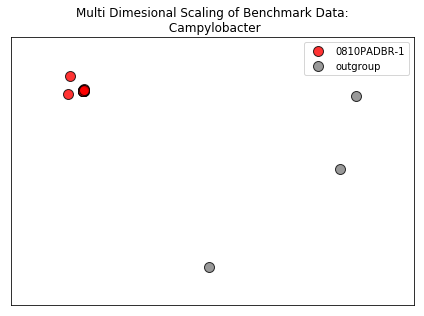

In [11]:
### Plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4.5
plt.rcParams["figure.figsize"] = fig_size

### Plot
groups = Plot.groupby('Outbreak')
fig, ax = plt.subplots()
ax.margins(0.2) # Optional, just adds 5% padding to the autoscaling

colors = ['red', 'grey']
alphas = np.linspace(.2, .8, len(groups))
for group, color, alpha in zip(groups, colors, alphas):
    ax.plot(group[1].x, 
            group[1].y, 
            marker='o', 
            linestyle='', 
            ms=10, 
            label=group[0], 
            c=color, 
            alpha=0.8,
            markeredgecolor='k', 
           )

lgd = pylab.legend(loc=1)
# ax.legend_.remove()
plt.title("Multi Dimesional Scaling of Benchmark Data:\n Campylobacter")
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.show()